# CFD Homework 1

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [176]:
def expEuler(g,dt,xik,tk):
    xik1 = xik + dt*g(xik,tk)
    return xik1

def impEulerP1(g,dt,xik,tk):
    xik1 = xik / (1 + 2 * dt)
    return xik1

def RK2(g,dt,xik,tk):
    K0 = g(xik,tk)
    K1 = g(xik+dt*K0/2,tk+dt/2)
    xik1 = xik + dt*K1
    return xik1

def RK4(g,dt,xik,tk):
    K0 = g(xik,tk)
    K1 = g(xik+dt*K0/2,tk+dt/2)
    K2 = g(xik+dt*K1/2,tk+dt/2)
    K3 = g(xik+dt*K2,tk+dt)
    xik1 = xik + (K0+2*K1+2*K2+K3)*dt/6
    return xik1
    

def plot_func_old(func, x=np.linspace(0,5,3001), logscale=False, ylim=[], xlabel='', ylabel=''):
    y = np.vectorize(func)(x)
    plt.figure(figsize=(5,5))
    axes_internal = plt.gca()
    if logscale: axes_internal.set_yscale('log')
    if len(ylim) == 2: axes_internal.set_ylim(ylim)
    if xlabel: axes_internal.set_xlabel(xlabel)
    if ylabel: axes_internal.set_ylabel(ylabel)
    plt.title(func.__name__)
    plt.plot(x,y)
    plt.show()

    
def plot_vals(x1, y1, y2, y3, y4, logscale = False, xlabel='', ylabel='', title=''):
    plt.figure(figsize=(5,5))
    axes_internal = plt.gca()
    if logscale: 
        # axes_internal.set_yscale('log')
        axes_internal.set_xscale('log')
    if xlabel: axes_internal.set_xlabel(xlabel)
    if ylabel: axes_internal.set_ylabel(ylabel)
    if title: plt.title(title)
    plt.plot(x1,y1, label = 'Explicit Euler')
    if y2.any(): plt.plot(x1,y2, label = 'Implicit Euler')
    if y3.any(): plt.plot(x1,y3, label = 'RK2')
    if y4.any(): plt.plot(x1,y4, label = 'RK4')
    plt.legend()
    plt.show()



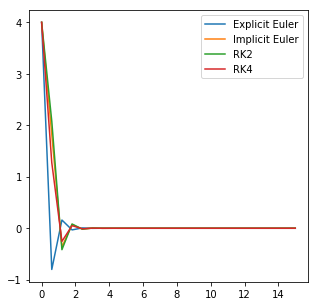

0.6


In [194]:
# Problem 1
def g1(y,t):
    return -2*y



dt = 0.6
tmin = 0
tmax = 15
xi0 = 4


numvals = math.floor((tmax-tmin)/dt)
vals = np.zeros((numvals+1, 5))
vals [:,0] = np.linspace(tmin,tmax,numvals+1)
truedt = vals[1,0] - vals[0,0]
vals[0,1] = xi0
vals[0,2] = xi0
vals[0,3] = xi0
vals[0,4] = xi0


for i in np.arange(0,numvals):
    tval = vals[i,0]
    xik = vals[i,1]
    vals[i+1,1] = expEuler(g1,dt,xik,tval)
    vals[i+1,2] = impEulerP1(g,dt,xik,tval)
    vals[i+1,3] = RK2(g,dt,xik,tval)
    vals[i+1,4] = RK4(g,dt,xik,tval)

plot_vals(vals[:,0],vals[:,1],vals[:,2],vals[:,3],vals[:,4],logscale = False)

print(truedt)